In [1]:
#Importing necessary Libraries

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("winequality-red.csv")
df.head()

# All data is in form of numbers ,so no encoding required

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
#For rows and colums check of data set

df.shape

(1599, 12)

In [4]:
from collections import Counter
Counter(df['quality'])
#Outcome is multi-class not binary

Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})

In [5]:
df.isna().sum()
#No NAN present

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.info()
#D-type is also satisfactory

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.describe()
# Here Data is behaving normally,mean,std,,min,max are also looking satisfactory

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
# Importing necessary Libraries

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

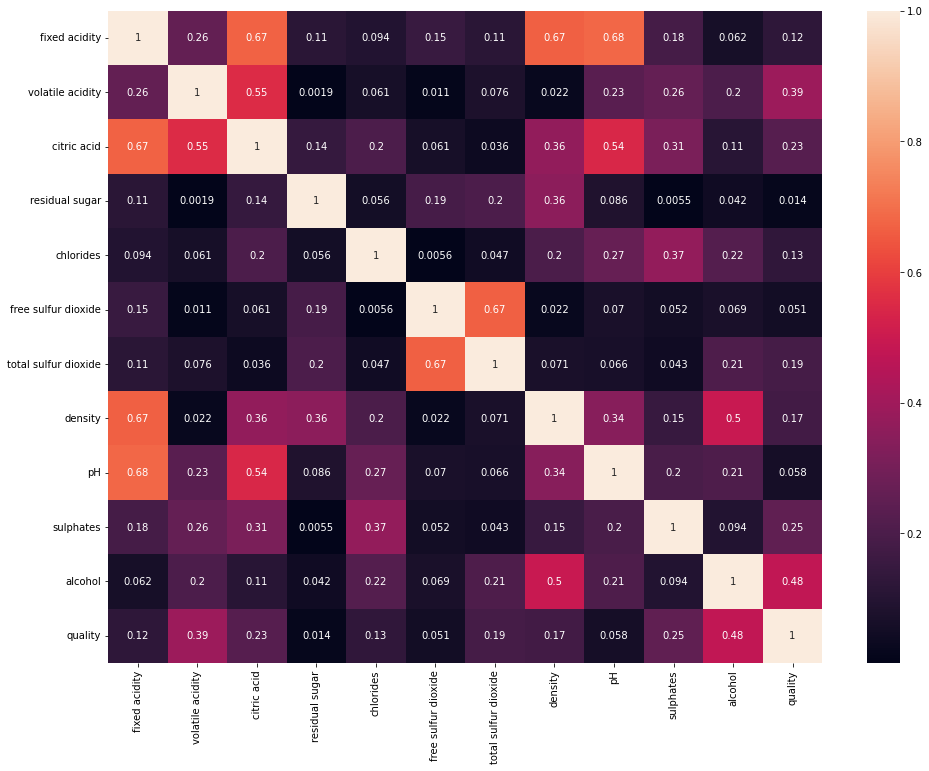

In [9]:
#Features are 12,lets check the multi-collinearity problem wherwe if one feature is dependent on another here if we get this we dont consider the feature after our analysis with target variable (Which is least contributing to our Outcome)
df_corr = df.corr().abs()
plt.figure(figsize=(16,12))
sns.heatmap(df_corr,annot=True)

# Here using colored scale on the right side of heatmap enables us to ascertain the level of correllation, here this mirror like colors according to their density and lightness as in correlation with scale representing the values on both sides(i.e. Highest correlation=1)

# Their is no multi-collinearity problem all features are important(my assump of threshold is 80%)


# We are not Standardizing the data as Decision tree will take care of this


In [10]:
#Seprating features and label for train_test_split 

x = df.drop(columns=['quality'])
y = df['quality']

In [11]:
#Applying train-test_split where test_size has been taken 0.25(test_size) and random state for random selection of data for trying to reduce level of biasness
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=21)

In [12]:
# Writing a function to ascertain score here it is directly correlated to Time-Saving

def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print("\n==========Train Result==============")
        print(f"Accuracy score:{accuracy_score(y_train,y_pred)*100:.2f}%")
    
    elif train==False:
        pred=clf.predict(x_test)
        print("\n=====Test Result=======")
        print(f"Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%")
        print("\nClassification Report","\n", classification_report(y_test,pred))

    

In [13]:
#Creating a object for our M.L. Algorithm i.e. D_tree
D_tree = DecisionTreeClassifier()

In [14]:
#Creating a object for our M.L. Algorithm i.e. D_tree
D_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [15]:
#Model has learnt now let's call the function for results
#Calling the function ,where classifier i.e. clf(Algo used) is DecisionTreeClassifier taken in object-D_tree
metric_score(D_tree,x_train,x_test,y_train,y_test,train=True)
metric_score(D_tree,x_train,x_test,y_train,y_test,train=False)


==========Train Result==============
Accuracy score:100.00%

=====Test Result=======
Accuracy score:58.75%

Classification Report 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.20      0.12      0.15        17
           5       0.66      0.66      0.66       158
           6       0.60      0.57      0.59       167
           7       0.52      0.57      0.54        53
           8       0.20      0.67      0.31         3

    accuracy                           0.59       400
   macro avg       0.36      0.43      0.37       400
weighted avg       0.59      0.59      0.59       400



In [16]:
#We got very less F1 Score and as per nature of Decision Tree algorithm is known to overfit as it is a rule based algorithm
#Lets try and increase our Accuracy using Hyperparameter tuning using Grid Search CV, here we will tune the parameters to increase our model accuracy
# Parameters with maximum impact is taken in grid_param where gini and entropy are the methods of Decision Tree and rest all belongs to Tree which it makes behind the scene

grid_param = {'criterion':['gini','entropy'],
             'max_depth':range(10,15),
             'min_samples_leaf':range(2,6),
             'min_samples_split':range(3,8),
             'max_leaf_nodes':range(5,10)}

#By default it gives Gini method as entropy has log transformation which takes more time and here we are concerned in improving accuracy ,hence we need the best method

In [17]:
#Here creating Object to use GridSearchCV with telling the algorithm in form of estimator and giving param_grid in form of object grid_param
gridsearch = GridSearchCV(estimator=D_tree,param_grid=grid_param)

In [18]:
#Here we are training through GridSearchCV to get the best parameters from above mentioned object i.e.(grid_param)
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [19]:
#The Best parameters printing using best_params_ method
best_parameters = gridsearch.best_params_
best_parameters

{'criterion': 'entropy',
 'max_depth': 10,
 'max_leaf_nodes': 9,
 'min_samples_leaf': 2,
 'min_samples_split': 3}

In [20]:
#Initiating DecisionTreeClassifier with best parameters
clf = DecisionTreeClassifier(criterion='entropy',max_depth=10,max_leaf_nodes=9, min_samples_split=3,min_samples_leaf=2)
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=9,
                       min_samples_leaf=2, min_samples_split=3)

In [21]:
#DecisionTreeClassifier score after Hyperparameter tuning

metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


==========Train Result==============
Accuracy score:58.88%

=====Test Result=======
Accuracy score:58.75%

Classification Report 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        17
           5       0.62      0.77      0.69       158
           6       0.55      0.54      0.55       167
           7       0.56      0.42      0.48        53
           8       0.00      0.00      0.00         3

    accuracy                           0.59       400
   macro avg       0.29      0.29      0.29       400
weighted avg       0.55      0.59      0.56       400



In [22]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [23]:
#For KNN algorithm

def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print("\n==========Train Result==============")
        print(f"Accuracy score:{accuracy_score(y_train,y_pred)*100:.2f}%")
    
    elif train==False:
        pred=clf.predict(x_test)
        print("\n=====Test Result=======")
        print(f"Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%")
        print("\nClassification Report","\n",classification_report(y_test,pred))


In [24]:
#Training and testing score with accuracy Score using KNN
metric_score(KNN,x_train,x_test,y_train,y_test,train=True)
metric_score(KNN,x_train,x_test,y_train,y_test,train=False)


==========Train Result==============
Accuracy score:64.39%

=====Test Result=======
Accuracy score:49.00%

Classification Report 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.25      0.06      0.10        17
           5       0.50      0.60      0.55       158
           6       0.48      0.50      0.49       167
           7       0.53      0.32      0.40        53
           8       0.00      0.00      0.00         3

    accuracy                           0.49       400
   macro avg       0.29      0.25      0.25       400
weighted avg       0.48      0.49      0.48       400



In [25]:
#Importing RandomForestClassifier ML algorithm for comparative analysis
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train,y_train)

RandomForestClassifier()

In [26]:
#Defining the function forRandomForestClassifier
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print("\n==========Train Result==============")
        print(f"Accuracy score:{accuracy_score(y_train,y_pred)*100:.2f}%")
    
    elif train==False:
        pred=clf.predict(x_test)
        print("\n=====Test Result=======")
        print(f"Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%")
        print("\nClassification Report","\n",classification_report(y_test,pred))

In [27]:
#Calling the function using RandomForest as clf
metric_score(RF,x_train,x_test,y_train,y_test,train=True)
metric_score(RF,x_train,x_test,y_train,y_test,train=False)


==========Train Result==============
Accuracy score:100.00%

=====Test Result=======
Accuracy score:68.00%

Classification Report 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        17
           5       0.70      0.82      0.75       158
           6       0.67      0.68      0.68       167
           7       0.65      0.53      0.58        53
           8       0.50      0.33      0.40         3

    accuracy                           0.68       400
   macro avg       0.42      0.39      0.40       400
weighted avg       0.65      0.68      0.66       400



In [28]:
#Score of ROC AUC

x = df.drop(columns=['quality'],axis=1)
y = df['quality']

In [29]:
#Train Test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=41)

In [30]:
#Training with all Classifiers

D_tree.fit(x_train,y_train)
KNN.fit(x_train,y_train)
RF.fit(x_train,y_train)
print("All models are successfully Trained")

All models are successfully Trained


In [31]:
#Capturing all models score

Decision_tree_auc_score=D_tree.score(x_test,y_test)
Random_forest_auc_score=RF.score(x_test,y_test)
KNeighbors_auc_score=KNN.score(x_test,y_test)

print("All models scores are captured")

All models scores are captured


In [32]:
print('DecisionTreeClassifier auc_score is ========',Decision_tree_auc_score)
print('RandomForestClassisfier auc_score is =======',Random_forest_auc_score)
print('KNeighborsClassifier auc_score is ==========',KNeighbors_auc_score)

DecisionTreeClassifier auc_score is ======== 0.6225
RandomForestClassisfier auc_score is ======= 0.6975
KNeighborsClassifier auc_score is ========== 0.445


In [33]:
#Here we can clearly see that Decision Tree Classifier Score is giving the clarity in Training_Testing Score and even after Hyperparameter Tuning
#Score of Decision Tree Classifier is acceptable.